# Applied Data Science Capstone
## The Battle of the Neighborhoods

### Introduction: The Problem

### Data

First, let's import all of the necessary libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
import requests 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


Next, we will get the county data from our datasource

In [2]:
county_data = pd.read_html("https://en.wikipedia.org/wiki/User:Michael_J/County_table")

In [3]:
county_data = county_data[0]
county_data.head()

,Sort [1],State,FIPS,County [2],County Seat(s) [3],Population(2010),Land Areakm²,Land Areami²,Water Areakm²,Water Areami²,Total Areakm²,Total Areami²,Latitude,Longitude
0,1,AL,1001,Autauga,Prattville,54571,1539.582,594.436,25.776,9.952,1565.358,604.388,+32.536382°,–86.644490°
1,2,AL,1003,Baldwin,Bay Minette,182265,4117.522,1589.784,1133.190,437.527,5250.712,2027.311,+30.659218°,–87.746067°
2,3,AL,1005,Barbour,Clayton,27457,2291.819,884.876,50.865,19.639,2342.684,904.515,+31.870670°,–85.405456°
3,4,AL,1007,Bibb,Centreville,22915,1612.481,622.582,9.289,3.587,1621.770,626.169,+33.015893°,–87.127148°
4,5,AL,1009,Blount,Oneonta,57322,1669.962,644.776,15.157,5.852,1685.119,650.628,+33.977448°,–86.567246°


We only need a subset of counties for this project, so we will now divide the dataset by creating datasets containing State, County, Latitude, and Longitude for each of the states.

In [4]:
D_county_list = ['District of Columbia']
M_county_list = ['Calvert','Charles','Frederick','Montgomery',"Prince George's"]
V_county_list = ['Alexandria','Arlington','Clarke','Culpeper','Fairfax','Falls Church','Fauquier','Fredericksburg','Loudoun','Manasses','Manassas Park','Prince William','Rappahannock','Spotsylvania','Stafford','Warren']
WV_county_list = ['Jefferson']

In [5]:
va_county_data = county_data[county_data["State"]=="VA"]
va_county_data = va_county_data.rename(columns={"County [2]": "County"})
va_county_data = va_county_data.reset_index()
va_county_data = va_county_data[['State','County','Latitude','Longitude']]
va_county_data['Longitude'] = va_county_data['Longitude'].str.rstrip('°')
va_county_data['Longitude'] = va_county_data['Longitude'].str.replace('–','-')
va_county_data['Latitude'] = va_county_data['Latitude'].str.rstrip('°')
va_county_data['Latitude'] = va_county_data['Latitude'].str.replace('+','')
va_county_data['County'] = va_county_data['County'].str.rstrip(' [9]')
va_county_data = va_county_data[va_county_data['County'].isin(V_county_list)]
va_county_data.head()

,State,County,Latitude,Longitude
6,VA,Arlington,38.878337,-77.100703
21,VA,Clarke,39.115931,-77.992004
23,VA,Culpeper,38.485930,-77.956476
28,VA,Fairfax,38.833743,-77.276117
29,VA,Fauquier,38.744103,-77.821585


In [6]:
dc_county_data = county_data[county_data["State"]=="DC"]
dc_county_data = dc_county_data.rename(columns={"County [2]": "County"})
dc_county_data = dc_county_data.reset_index()
dc_county_data = dc_county_data[['State','County','Latitude','Longitude']]
dc_county_data['Longitude'] = dc_county_data['Longitude'].str.rstrip('°')
dc_county_data['Longitude'] = dc_county_data['Longitude'].str.replace('–','-')
dc_county_data['Latitude'] = dc_county_data['Latitude'].str.rstrip('°')
dc_county_data['Latitude'] = dc_county_data['Latitude'].str.replace('+','')
dc_county_data['County'] = dc_county_data['County'].str.rstrip(' [7]')
dc_county_data = dc_county_data[dc_county_data['County'].isin(D_county_list)]
dc_county_data.head()

,State,County,Latitude,Longitude
0,DC,District of Columbia,38.904149,-77.017094


In [7]:
md_county_data = county_data[county_data["State"]=="MD"]
md_county_data = md_county_data.rename(columns={"County [2]": "County"})
md_county_data = md_county_data.reset_index()
md_county_data = md_county_data[['State','County','Latitude','Longitude']]
md_county_data['Longitude'] = md_county_data['Longitude'].str.rstrip('°')
md_county_data['Longitude'] = md_county_data['Longitude'].str.replace('–','-')
md_county_data['Latitude'] = md_county_data['Latitude'].str.rstrip('°')
md_county_data['Latitude'] = md_county_data['Latitude'].str.replace('+','')
md_county_data = md_county_data[md_county_data['County'].isin(M_county_list)]
md_county_data.head()

,State,County,Latitude,Longitude
3,MD,Calvert,38.521358,-76.525864
7,MD,Charles,38.472853,-77.015427
9,MD,Frederick,39.470427,-77.397627
14,MD,Montgomery,39.137382,-77.203063
15,MD,Prince George's,38.825880,-76.847272


In [8]:
wv_county_data = county_data[county_data["State"]=="WV"]
wv_county_data = wv_county_data.rename(columns={"County [2]": "County"})
wv_county_data = wv_county_data.reset_index()
wv_county_data = wv_county_data[['State','County','Latitude','Longitude']]
wv_county_data['Longitude'] = wv_county_data['Longitude'].str.rstrip('°')
wv_county_data['Longitude'] = wv_county_data['Longitude'].str.replace('–','-')
wv_county_data['Latitude'] = wv_county_data['Latitude'].str.rstrip('°')
wv_county_data['Latitude'] = wv_county_data['Latitude'].str.replace('+','')
wv_county_data = wv_county_data[wv_county_data['County'].isin(WV_county_list)]
wv_county_data.head()

,State,County,Latitude,Longitude
18,WV,Jefferson,39.307399,-77.863220


We can combine all of the dataframes for the individual states into one dataset, then transform the data as necessary for the analysis.

In [9]:
dmv_data = pd.concat([va_county_data,md_county_data,dc_county_data,wv_county_data],ignore_index=True)
dmv_data

,State,County,Latitude,Longitude
0,VA,Arlington,38.878337,-77.100703
1,VA,Clarke,39.115931,-77.992004
2,VA,Culpeper,38.485930,-77.956476
3,VA,Fairfax,38.833743,-77.276117
4,VA,Fauquier,38.744103,-77.821585
5,VA,Loudoun,39.081130,-77.638857
6,VA,Prince William,38.702332,-77.478887
7,VA,Rappahannock,38.684522,-78.168824
8,VA,Spotsylvania,38.182311,-77.656280
9,VA,Stafford,38.418933,-77.459043


In [10]:
dmv_data = dmv_data.drop_duplicates(subset=['County','State'])
dmv_data = dmv_data.reindex()

In [11]:
dmv_data.dtypes

State        object
County       object
Latitude     object
Longitude    object
dtype: object

In [12]:
dmv_data["Longitude"] = pd.to_numeric(dmv_data["Longitude"],downcast='float')
dmv_data["Latitude"] = pd.to_numeric(dmv_data["Latitude"],downcast='float')

In [13]:
print(dmv_data.head())
dmv_data.dtypes

  State     County   Latitude  Longitude
0    VA  Arlington  38.878338 -77.100700
1    VA     Clarke  39.115932 -77.992004
2    VA   Culpeper  38.485931 -77.956474
3    VA    Fairfax  38.833744 -77.276115
4    VA   Fauquier  38.744102 -77.821587


State         object
County        object
Latitude     float32
Longitude    float32
dtype: object

Next, we will install the Folium package to be used for creating maps.

In [14]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

We additionally need to set the latitude and longitude for the DMV area so that our map can be centered.

In [15]:
latitude = 39.1290
longitude = -77.3784
print('The geograpical coordinate of the DMV area are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the DMV area are 39.129, -77.3784.


Let's generate a map of the DMV with each of our counties marked.

In [16]:
map_dmv = folium.Map(location=[latitude,longitude],zoom_start=8)
for lat, lng, county,state in zip(dmv_data['Latitude'], dmv_data['Longitude'], dmv_data['County'], dmv_data['State']):
    label = '{}, {}'.format(county, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dmv)  
    
map_dmv

In [17]:
# The code was removed by Watson Studio for sharing.

Now, we need to get venue information for each of our locations, which we will do with the getNearbyVenues function below.

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['County', 
                  'County Latitude', 
                  'County Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
LIMIT = 100
radius = 500
dmv_venues = getNearbyVenues(names=dmv_data['County'],
                                   latitudes=dmv_data['Latitude'],
                                   longitudes=dmv_data['Longitude']
                                  )

Arlington
Clarke
Culpeper
Fairfax
Fauquier
Loudoun
Prince William
Rappahannock
Spotsylvania
Stafford
Warren
Alexandria
Falls Church
Fredericksburg
Manassas Park
Calvert
Charles
Frederick
Montgomery
Prince George's
District of Columbia
Jefferson


In [20]:
print(dmv_venues.shape)
dmv_venues.head()

(157, 7)


,County,County Latitude,County Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arlington,38.878338,-77.1007,Tranquil Space,38.882139,-77.101727,Yoga Studio
1,Arlington,38.878338,-77.1007,Arlington Arts Center,38.882094,-77.102294,Art Gallery
2,Arlington,38.878338,-77.1007,7-Eleven,38.882183,-77.101241,Convenience Store
3,Arlington,38.878338,-77.1007,Staples,38.880786,-77.104387,Paper / Office Supplies Store
4,Arlington,38.878338,-77.1007,Brookdale Arlington,38.880997,-77.105140,Assisted Living


In [21]:
print('There are {} unique venue categories.'.format(len(dmv_venues['Venue Category'].unique())))


There are 94 unique venue categories.


Now that we have our venue data, we need to manipulate it into a usable format by using one-hot encoding and grouping together, then determining the top ten venues for each location.

In [22]:
dmv_onehot = pd.get_dummies(dmv_venues[['Venue Category']], prefix="", prefix_sep="")
dmv_onehot['County'] = dmv_venues['County']
cols = dmv_onehot.columns.tolist()
cols.insert(0,cols.pop(cols.index('County')))
dmv_onehot = dmv_onehot.reindex(columns=cols)

dmv_onehot.head()

,County,American Restaurant,Art Gallery,Assisted Living,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Big Box Store,Bike Rental / Bike Share,Bistro,Boutique,Bowling Alley,Brazilian Restaurant,Brewery,Burger Joint,Bus Stop,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cycle Studio,Deli / Bodega,Discount Store,Donut Shop,Farmers Market,Fast Food Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Liquor Store,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Motorsports Shop,Music Store,Music Venue,Nail Salon,New American Restaurant,Non-Profit,Paper / Office Supplies Store,Park,Persian Restaurant,Pharmacy,Pizza Place,Playground,Pool,Rental Car Location,Rental Service,Salad Place,Salon / Barbershop,Sandwich Place,Shipping Store,Smoothie Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Stadium,Storage Facility,Supermarket,Sushi Restaurant,Synagogue,Taco Place,Tennis Court,Toy / Game Store,Track,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Arlington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Arlington,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Arlington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Arlington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Arlington,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
dmv_grouped = dmv_onehot.groupby('County').mean().reset_index()
dmv_grouped

,County,American Restaurant,Art Gallery,Assisted Living,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Big Box Store,Bike Rental / Bike Share,Bistro,Boutique,Bowling Alley,Brazilian Restaurant,Brewery,Burger Joint,Bus Stop,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cycle Studio,Deli / Bodega,Discount Store,Donut Shop,Farmers Market,Fast Food Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Liquor Store,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Motorsports Shop,Music Store,Music Venue,Nail Salon,New American Restaurant,Non-Profit,Paper / Office Supplies Store,Park,Persian Restaurant,Pharmacy,Pizza Place,Playground,Pool,Rental Car Location,Rental Service,Salad Place,Salon / Barbershop,Sandwich Place,Shipping Store,Smoothie Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Stadium,Storage Facility,Supermarket,Sushi Restaurant,Synagogue,Taco Place,Tennis Court,Toy / Game Store,Track,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Alexandria,0.000000,0.2,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.200000,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,Arlington,0.000000,0.2,0.2,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.200000
2,District of Columbia,0.041667,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000,0.000000,0.020833,0.000000,0.020833,0.020833,0.020833,0.000000,0.000000,0.020833,0.020833,0.041667,0.000000,0.020833,0.020833,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.041667,0.083333,0.041667,0.020833,0.041667,0.000000,0.020833,0.041667,0.041667,0.020833,0.020833,0.020833,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.0,0.000000,0.000000,0.020833,0.041667,0.0,0.020833,0.000000,0.00,0.020833,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000,0.041667,0.000000,0.0,0.000000,0.000000,0.000000,0.020833,0.020833,0.0,0.000000,0.0,0.020833,0.020833,0.000000,0.000000,0.0,0.020833,0.000000
3,Fairfax,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [42]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [57]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['County']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
counties_venues_sorted = pd.DataFrame(columns=columns)
counties_venues_sorted['County'] = dmv_grouped['County']

for ind in np.arange(dmv_grouped.shape[0]):
    counties_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dmv_grouped.iloc[ind, :], num_top_venues)

counties_venues_sorted

,County,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandria,Art Gallery,Playground,Park,Tennis Court,Garden,Yoga Studio,Furniture / Home Store,Cycle Studio,Deli / Bodega,Discount Store
1,Arlington,Yoga Studio,Art Gallery,Assisted Living,Paper / Office Supplies Store,Convenience Store,Garden,Deli / Bodega,Discount Store,Donut Shop,Farmers Market
2,District of Columbia,Gym,New American Restaurant,Coffee Shop,Italian Restaurant,Intersection,Southern / Soul Food Restaurant,Hotel,Gym / Fitness Center,Grocery Store,American Restaurant
3,Fairfax,Garden,Track,Park,Stadium,Pool,Gym / Fitness Center,Gym,Convenience Store,Cycle Studio,Deli / Bodega
4,Falls Church,Bakery,Bar,Sushi Restaurant,Yoga Studio,Gym / Fitness Center,Music Store,Middle Eastern Restaurant,Pizza Place,Coffee Shop,Italian Restaurant
5,Frederick,American Restaurant,Liquor Store,Gas Station,Cycle Studio,Deli / Bodega,Discount Store,Donut Shop,Farmers Market,Fast Food Restaurant,Frozen Yogurt Shop
6,Fredericksburg,Coffee Shop,Sandwich Place,Pharmacy,Mexican Restaurant,Fast Food Restaurant,Sushi Restaurant,Furniture / Home Store,Convenience Store,Cycle Studio,Deli / Bodega
7,Jefferson,Convenience Store,Sandwich Place,Chinese Restaurant,Discount Store,Pharmacy,Furniture / Home Store,Cycle Studio,Deli / Bodega,Donut Shop,Farmers Market
8,Manassas Park,Gas Station,Japanese Restaurant,Mexican Restaurant,Indian Restaurant,Convenience Store,Pharmacy,Fast Food Restaurant,Storage Facility,Motorcycle Shop,Rental Car Location
9,Montgomery,Athletics & Sports,Park,Furniture / Home Store,Rental Service,Yoga Studio,Garden,Cycle Studio,Deli / Bodega,Discount Store,Donut Shop


In [58]:
dmv_grouped_clustering = dmv_grouped.drop('County', 1)


Now, we will use k-means clustering to divide our dataset into clusters. We will first use the elbow method of k selection to determine the optimal k for our analysis.

In [59]:
Sum_of_squared_distances = []
K = range(1,14)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dmv_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

In [60]:
import matplotlib.pyplot as plt

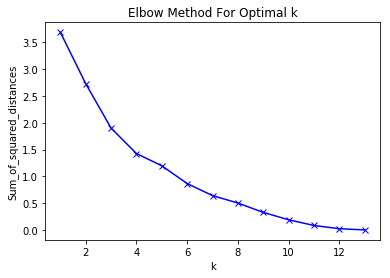

In [61]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [62]:
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dmv_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 1, 1, 3, 1, 4, 1, 1, 1, 3], dtype=int32)

In [63]:
len(kmeans.labels_)

13

In [64]:
counties_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
dmv_merged = dmv_data

Merge our county data with our clustering data for mapping.

In [65]:
dmv_merged = dmv_merged.join(counties_venues_sorted.set_index('County'), on='County')

In [66]:
dmv_merged = dmv_merged.dropna()

In [67]:
dmv_merged["Cluster Labels"] = pd.to_numeric(dmv_merged["Cluster Labels"],downcast='integer')

In [68]:
dmv_merged.dtypes

State                      object
County                     object
Latitude                  float32
Longitude                 float32
Cluster Labels               int8
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [72]:
dmv_merged

,State,County,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,VA,Arlington,38.878338,-77.100700,1,Yoga Studio,Art Gallery,Assisted Living,Paper / Office Supplies Store,Convenience Store,Garden,Deli / Bodega,Discount Store,Donut Shop,Farmers Market
3,VA,Fairfax,38.833744,-77.276115,3,Garden,Track,Park,Stadium,Pool,Gym / Fitness Center,Gym,Convenience Store,Cycle Studio,Deli / Bodega
7,VA,Rappahannock,38.684521,-78.168823,2,Wine Bar,Yoga Studio,Garden,Convenience Store,Cycle Studio,Deli / Bodega,Discount Store,Donut Shop,Farmers Market,Fast Food Restaurant
10,VA,Warren,38.908188,-78.207130,0,Park,Yoga Studio,Garden,Cycle Studio,Deli / Bodega,Discount Store,Donut Shop,Farmers Market,Fast Food Restaurant,Frozen Yogurt Shop
11,VA,Alexandria,38.818344,-77.082024,3,Art Gallery,Playground,Park,Tennis Court,Garden,Yoga Studio,Furniture / Home Store,Cycle Studio,Deli / Bodega,Discount Store
13,VA,Falls Church,38.883785,-77.174637,1,Bakery,Bar,Sushi Restaurant,Yoga Studio,Gym / Fitness Center,Music Store,Middle Eastern Restaurant,Pizza Place,Coffee Shop,Italian Restaurant
14,VA,Fredericksburg,38.299271,-77.486656,1,Coffee Shop,Sandwich Place,Pharmacy,Mexican Restaurant,Fast Food Restaurant,Sushi Restaurant,Furniture / Home Store,Convenience Store,Cycle Studio,Deli / Bodega
15,VA,Manassas Park,38.768990,-77.448685,1,Gas Station,Japanese Restaurant,Mexican Restaurant,Indian Restaurant,Convenience Store,Pharmacy,Fast Food Restaurant,Storage Facility,Motorcycle Shop,Rental Car Location
18,MD,Frederick,39.470428,-77.397629,4,American Restaurant,Liquor Store,Gas Station,Cycle Studio,Deli / Bodega,Discount Store,Donut Shop,Farmers Market,Fast Food Restaurant,Frozen Yogurt Shop
19,MD,Montgomery,39.137383,-77.203064,3,Athletics & Sports,Park,Furniture / Home Store,Rental Service,Yoga Studio,Garden,Cycle Studio,Deli / Bodega,Discount Store,Donut Shop


In [71]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,state in zip(dmv_merged['Latitude'], dmv_merged['Longitude'], dmv_merged['County'], dmv_merged['Cluster Labels'], dmv_merged['State']):
    label = folium.Popup(str(poi) + ', ' + str(state) + ': Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters